<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

# 테니스 날씨 데이터 만들기 

data_dict = {
    'Outlook' : ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
    ,'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild','Mild','Mild', 'Hot', 'Mild']
    ,'Humidity' : ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High','Normal','Normal', 'Normal', 'High', 'Normal', 'High']
    ,'Wind': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']
    ,'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

tennis = pd.DataFrame(data_dict, columns=data_dict.keys())
tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [11]:
# 원시 데이터 --> 학습 데이터 

x = tennis.iloc[:, range(4)]
x = pd.get_dummies(x)
y = tennis[['PlayTennis']]

t = x.join(y)

display(t)


,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True,PlayTennis
0,0,0,1,0,1,0,1,0,1,0,No
1,0,0,1,0,1,0,1,0,0,1,No
2,1,0,0,0,1,0,1,0,1,0,Yes
3,0,1,0,0,0,1,1,0,1,0,Yes
4,0,1,0,1,0,0,0,1,1,0,Yes
5,0,1,0,1,0,0,0,1,0,1,No
6,1,0,0,1,0,0,0,1,0,1,Yes
7,0,0,1,0,0,1,1,0,1,0,No
8,0,0,1,1,0,0,0,1,1,0,Yes
9,0,1,0,0,0,1,0,1,1,0,Yes


In [12]:
# ID3 (iterative dichotomiser 3) 모델을 이용한 디시즌 트리 학습
from sklearn.tree import DecisionTreeClassifier

Deision_Tree = DecisionTreeClassifier(criterion='entropy')
result=Deision_Tree.fit(x, y)

[Text(0.6, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.5, 0.7, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'x[1] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.3, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'x[8] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.7, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

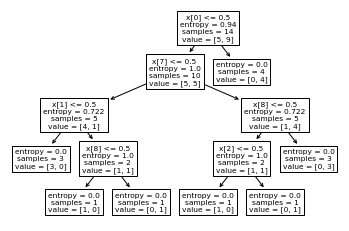

In [13]:
# 디시즌 트리 학습 결과 보기
from sklearn import tree
tree.plot_tree(result)


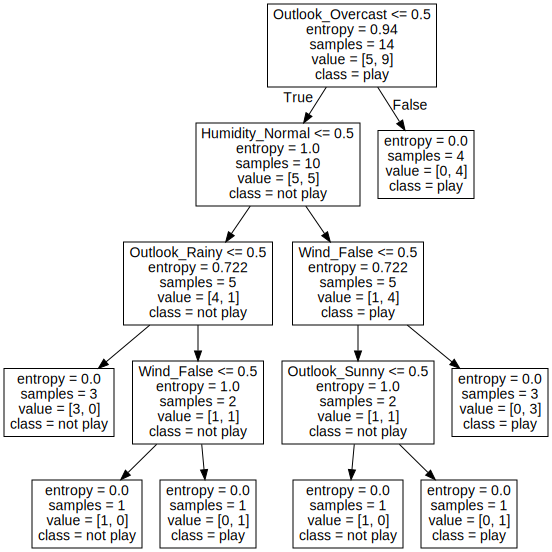

In [14]:
# 학습 결과 자세히 보기
import graphviz 
dot_data = tree.export_graphviz(result, out_file=None, feature_names=x.columns.tolist(),
                class_names=['not play', 'play']) 
graph = graphviz.Source(dot_data) 
graph

In [15]:
from sklearn.ensemble import AdaBoostClassifier

my_model = AdaBoostClassifier(n_estimators = 4, random_state = 10)
my_model.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=4, random_state=10)

In [19]:
x[0,]

KeyError: ignored

In [20]:

my_model.predict(x)

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)